In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
EARTH_MASS = 5.97 * 10e24 
MOON_MASS = 7.35 * 10e22
EARTH_FRACTION = EARTH_MASS/(EARTH_MASS+MOON_MASS)
MOON_FRACTION = MOON_MASS/(EARTH_MASS+MOON_MASS)
EARTH_MOON_DISTANCE = 384400
EARTH_DIAMETER = 6371
POSITION_SURFACE = EARTH_DIAMETER/EARTH_MOON_DISTANCE
POSITION_STABLE_ORBIT = (EARTH_DIAMETER+350)/EARTH_MOON_DISTANCE
GRAVITATIONAL_CONSTANT = 6.67430e-11

def Fx1(x, R):
    return (EARTH_FRACTION/R**3) * (x + MOON_FRACTION)
def Fx2(x, r):
    return (MOON_FRACTION/r**3) * (x - EARTH_FRACTION)
def Fy1(y, R):
    return (EARTH_FRACTION/R**3) * y
def Fy2(y, r):
    return (MOON_FRACTION/r**3) * y
def Fz1(z, R):
    return Fy1(z,R)
def Fz2(z, r):
    return Fy2(z, r)
def newR(x,y,z):
    return np.sqrt((x+MOON_FRACTION)**2 + y**2 + z**2)
def newr(x,y,z):
    return np.sqrt((x-EARTH_FRACTION)**2 + y**2 + z**2)

In [5]:
def RK4(system,initial_conditions,h, t_values):
    solution = np.zeros((len(t_values), len(initial_conditions)))
    solution[0] = initial_conditions
    
    for i in range(1,len(t_values)):
        t = t_values[i-1]
        variables = solution[i-1]
        
        k1 = h * np.array(system(variables, t))
        k2 = h * np.array(system(variables + 0.5 * k1, t + 0.5 * h))
        k3 = h * np.array(system(variables + 0.5 * k2, t + 0.5 * h))
        k4 = h * np.array(system(variables + k3, t + h))
    
        solution[i] = variables + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return solution

In [6]:
def ODE_system(variables, t):
    x, x_, y, y_, z, z_ = variables
    R,r = newR(x,y,z),newr(x,y,z)
    x__ = x + 2* y_ - Fx1(x, R) - Fx2(x, r)
    y__ = y - 2* x_ - Fy1(y, R) - Fy2(y, r)
    z__ = - Fz1(z, R) - Fz2(z, r)
    
    return x_,x__,y_,y__,z_,z__

In [7]:
initial_velocity = np.sqrt(GRAVITATIONAL_CONSTANT * MOON_MASS)/EARTH_MOON_DISTANCE

In [365]:
#initial_conditions = [POSITION_STABLE_ORBIT, 7.58, 0, 2.78, 0, 0]
greedy_crash_scenario = [POSITION_STABLE_ORBIT, 2.72, 0, 7.58, 0, 0]
flyby_miss_scenario = [POSITION_STABLE_ORBIT, 0, 0, 8.055, 0, 0]
flyby_return_scenario = [POSITION_STABLE_ORBIT, 1, 0, 8.0055, 0, 0]
good_enough_conditions = [POSITION_STABLE_ORBIT, 6.970 , 0, 4, 0, 0]

In [366]:
ODE_system(initial_conditions,1)

(6.97, -1115.9201607625719, 4, -13.94, 0, -0.0)

In [385]:
t_start, t_end = (0,2)
num_points = 2000
t_values,h = np.linspace(t_start,t_end,num_points,retstep=True)

In [386]:
#solution = odeint(ODE_system,initial_conditions,t_values)
solution = RK4(ODE_system,good_enough_conditions,h, t_values)

In [387]:
solution

array([[ 1.74843913e-02,  6.97000000e+00,  0.00000000e+00,
         4.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.39732229e-02,  6.06494184e+00,  3.97710983e-03,
         3.93698191e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.97125734e-02,  5.44278192e+00,  7.86489447e-03,
         3.83182119e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.41336640e-02,  3.30797910e-01, -3.66474429e-01,
        -1.26939676e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.44626039e-02,  3.26756750e-01, -3.67741585e-01,
        -1.26365413e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.47875118e-02,  3.22737826e-01, -3.69003015e-01,
        -1.25795138e+00,  0.00000000e+00,  0.00000000e+00]])

In [388]:
x_values = solution[:, 0]
y_values = solution[:, 2]
z_values = solution[:, 4]

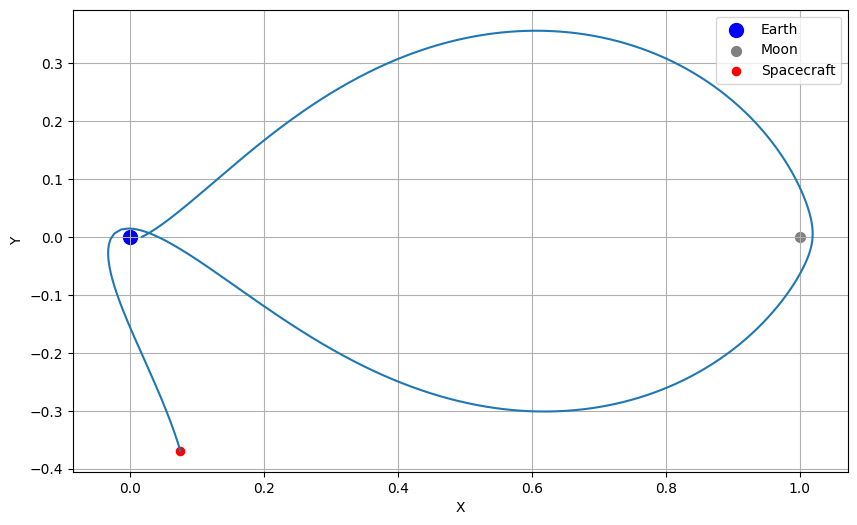

In [393]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.scatter(0, 0, color='blue', s=100, label='Earth')
plt.scatter(1, 0, color='grey', s=50, label='Moon')
plt.scatter(x_values[-1], y_values[-1], color='red', s=35, label='Spacecraft')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

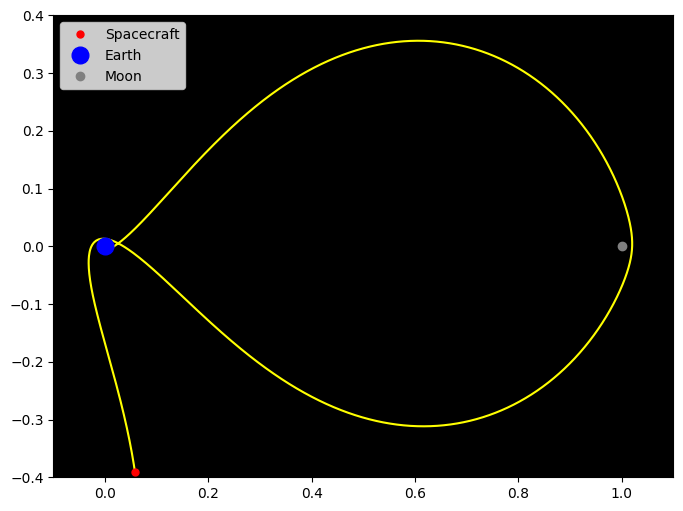

In [379]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.4, 0.4)
ax.set_facecolor("black")
line, = ax.plot([], [], color="yellow")
dot, = ax.plot([], [], 'ro', markersize=5, label="Spacecraft")  # Larger red dot for spacecraft
earth, = ax.plot(0, 0, 'bo', label='Earth',markersize=12)
moon, = ax.plot(1, 0, 'o',color="grey", label='Moon', markersize=6)
time_template = 'Time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    dot.set_data([], [])
    earth.set_data(0, 0)
    moon.set_data(1, 0)
    time_text.set_text('')
    return line, dot, earth, moon, time_text

def animate(i):
    x = solution[i, 0]
    y = solution[i, 2]
    line.set_data(solution[:i+1, 0], solution[:i+1, 2])
    dot.set_data(x, y)
    time_text.set_text(time_template % (i * (t_end - t_start) / num_points))
    legend = ax.legend(loc='upper right', frameon=True, fontsize='small', bbox_to_anchor=(1.0, 1.0), framealpha=0.7, facecolor='white')
    return line, dot, time_text

ani = FuncAnimation(fig, animate, frames=num_points, init_func=init, blit=True, interval=1)
ani.save("success.gif", writer='pillow')


plt.legend()
plt.show()